# Result Analysis

In [88]:
import json
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from os.path import join
from sklearn.metrics.pairwise import cosine_similarity

from img2vec_pytorch import Img2Vec
from PIL import Image

In [89]:
RUN_DIR = "../data/realistic_po_20_gpt-4-vision-preview_dall-e-3_gpt-4-1106-preview_v1"

In [90]:
def get_vecs_of_run(dir, img2vec_model):
    vec_dict = {}
    vec_dict['diff'] = json.load(open(join(dir, "difference_embeddings.json")))
    vec_dict['prompt'] = json.load(open(join(dir, "prompt_embeddings.json")))
    vec_dict['img'] = [img2vec_model.get_vec(Image.open(os.path.join(dir, f))) for f in os.listdir(dir) if os.path.isfile(os.path.join(dir, f)) and f.endswith(".png")]

    return vec_dict


def get_tsne(embeddings, labels=None, perplexity=30.0, random_state=20, title=''):
    fig = plt.figure()
    fig.suptitle(title)

    matrix = np.array(embeddings)
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=random_state, init='pca', learning_rate=200)
    vis_dims = tsne.fit_transform(matrix)
    x = vis_dims[:,0]
    y = vis_dims[:,1]
    weights = np.arange(1, len(embeddings) + 1)
    plt.scatter(x, y, c=weights, cmap="BuPu")
    if labels:
        [plt.text(i, j, l) for (i, j, l) in zip(x, y, labels)]
    plt.colorbar()

    return fig


def get_similarities(embeddings, labels=None, limit=False, title=''):
    fig = plt.figure()
    fig.suptitle(title)
    similarities = cosine_similarity(embeddings)[-1]
    x = np.arange(0, len(embeddings))
    y = similarities
    plt.scatter(x, similarities, marker='x')
    if labels:
        [plt.text(i, j, l) for (i, j, l) in zip(x, y, labels)]
    plt.xlabel("Iterations")
    plt.ylabel("Similarity")
    if limit:
        plt.ylim(0, 1)
    
    return fig

In [91]:
# get img vectors using img2vec
img2vec = Img2Vec(cuda=True)

# get all vecs
vecs = get_vecs_of_run(RUN_DIR, img2vec)

difference_embeddings = vecs['diff']
prompt_embeddings = vecs['prompt']
img_embeddings = vecs['img']

/home/linus/git/uni/PromptRefining/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/linus/git/uni/PromptRefining/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Load data from the specified directory

Print data using T-SNE

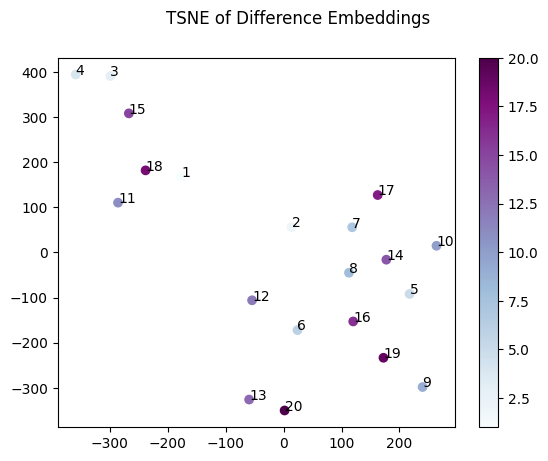

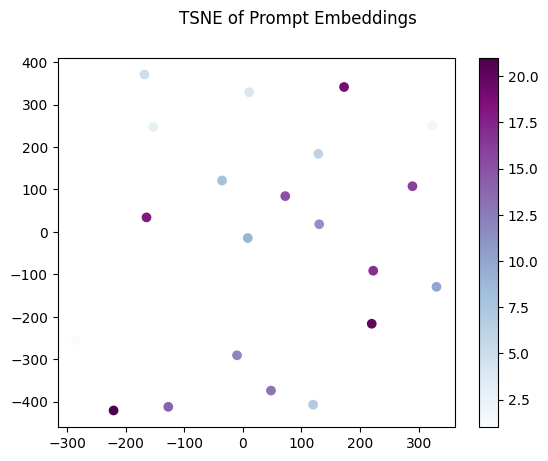

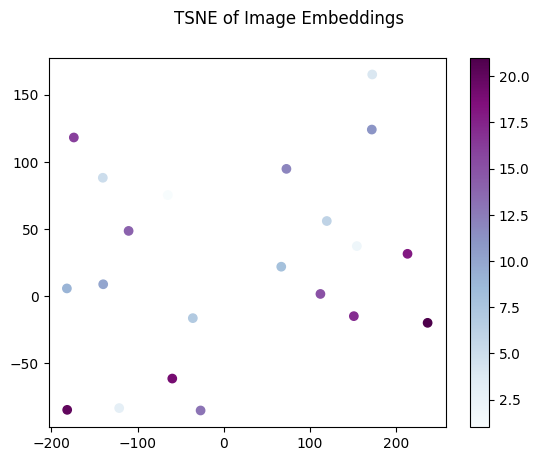

In [92]:
diff_labels = [f"{i + 1}" for i in range(0, len(difference_embeddings))]
prompt_labels = [f"{i + 1}" for i in range(0, len(prompt_embeddings))]
img_labels = [f"{i + 1}" for i in range(0, len(img_embeddings))]

diff_tsne = get_tsne(difference_embeddings, labels=diff_labels, perplexity=5, title = "TSNE of Difference Embeddings")
prompts_tsne = get_tsne(prompt_embeddings, perplexity=5, title = "TSNE of Prompt Embeddings")
img_tsne = get_tsne(img_embeddings, perplexity=5, title = "TSNE of Image Embeddings")

## Similarity
Assuming that the last iteration has a matching prompt, determine the similarity in the iterations.

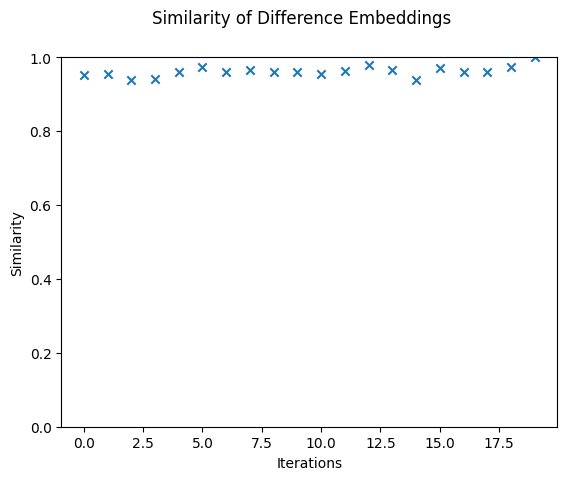

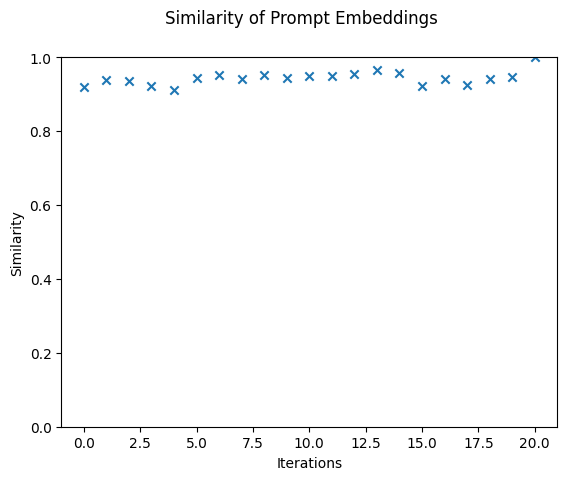

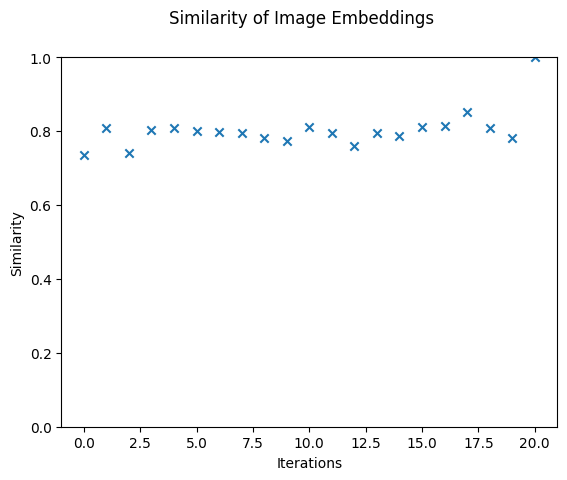

In [96]:
sim_diff = get_similarities(difference_embeddings, limit=True, title="Similarity of Difference Embeddings")
sim_prompt = get_similarities(prompt_embeddings, limit=True, title="Similarity of Prompt Embeddings")
sim_img = get_similarities(img_embeddings, limit=True, title="Similarity of Image Embeddings")




# More Plots

tbd: box plots, mean of img and prompt, relation between img and prompt, comparison of different runs, comparison between all runs?, alignment score? (derivative with positive vals only?)